# Collaborative Filtering - Item Based Recommender Systems

Lusia Juliana Silaban - 215314087

Marchella Alexandra Daya Guna - 215314059

Eustachia Agnesti Marta Da Silva - 215314085


# 1. Load Data

## Load books data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df_books1 = pd.read_csv('/content/drive/MyDrive/Sistem Rekomendasi/books.csv')
df_books1.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


# 2. Eksploratory Data Analysis

In [ ]:
df_books1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [ ]:
df_books = pd.read_csv("/content/drive/MyDrive/Sistem Rekomendasi/books.csv",
                 usecols=["book_id",
                          "original_publication_year",
                          "title",
                          "average_rating"])
df_books.head()

,book_id,original_publication_year,title,average_rating
0,2767052,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34
1,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,41865,2005.0,"Twilight (Twilight, #1)",3.57
3,2657,1960.0,To Kill a Mockingbird,4.25
4,4671,1925.0,The Great Gatsby,3.89


In [ ]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   original_publication_year  9979 non-null   float64
 2   title                      10000 non-null  object 
 3   average_rating             10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


## Check missing values of books

program dibawah digunakan untuk mendeteksi jumlah nilai yang hilang (missing values) pada setiap kolom dalam DataFrame df_books.

In [ ]:
missing_values1 = df_books.isnull().sum()

missing_values1.head()

,0
book_id,0
original_publication_year,21
title,0
average_rating,0


In [ ]:
# Hitung jumlah nilai unik dalam setiap kolom DataFrame df_books
jumlah_nilai_unik = df_books.nunique()
print(jumlah_nilai_unik)

book_id                      10000
original_publication_year      293
title                         9964
average_rating                 184
dtype: int64


In [ ]:
# # Menampilkan semua nilai unik beserta jumlah kata unik dan frekuensinya
# for col in df_books.columns:
#     print(f"Kolom: {col}")

#     # Mengambil nilai unik di kolom
#     unique_values = df_books[col].unique()

#     # Menampilkan nilai unik
#     print("Nilai unik:")
#     print(unique_values)

#     # Menampilkan jumlah kata unik (untuk tipe object, berdasarkan spasi)
#     if df_books[col].dtype == 'object':
#         word_counts = [len(str(value).split()) for value in unique_values]
#         print("Jumlah kata untuk tiap nilai unik:")
#         print(word_counts)

#     # Menampilkan jumlah total nilai unik
#     print(f"Jumlah nilai unik: {len(unique_values)}")

#     # Menampilkan frekuensi masing-masing nilai unik
#     print("Frekuensi nilai unik:")
#     print(df_books[col].value_counts())

#     print("\n","-" * 60)

## Load rating data

In [ ]:
df_rating = pd.read_csv("/content/drive/MyDrive/Sistem Rekomendasi/ratings.csv",
            usecols=["book_id", "user_id", "rating"])

df_rating.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


## Print rating information and missing values

In [ ]:
#digunakan untuk menampilkan ringkasan informasi mengenai struktur DataFrame df_rating yang telah dimuat dari file CSV
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [ ]:
#untuk mendeteksi jumlah nilai yang hilang (missing values) dalam DataFrame df_rating, yang berisi data rating buku.
missing_values2 = df_rating.isnull().sum()

missing_values2

,0
book_id,0
user_id,0
rating,0


In [ ]:
# # Menampilkan semua nilai unik beserta jumlah kata unik dan frekuensinya
# for col in df_rating.columns:
#     print(f"Kolom: {col}")

#     # Mengambil nilai unik di kolom
#     unique_values = df_rating[col].unique()

#     # Menampilkan nilai unik
#     print("Nilai unik:")
#     print(unique_values)

#     # Menampilkan jumlah kata unik (untuk tipe object, berdasarkan spasi)
#     if df_rating[col].dtype == 'object':
#         word_counts = [len(str(value).split()) for value in unique_values]
#         print("Jumlah kata untuk tiap nilai unik:")
#         print(word_counts)

#     # Menampilkan jumlah total nilai unik
#     print(f"Jumlah nilai unik: {len(unique_values)}")

#     # Menampilkan frekuensi masing-masing nilai unik
#     print("Frekuensi nilai unik:")
#     print(df_rating[col].value_counts())

#     print("\n","-" * 60)

# 3. Preprocessing

## Clean dataset

program dibawah digunakan untuk menghapus baris yang mengandung nilai kosong (missing values) dalam DataFrame df_books

In [ ]:
# hapus baris yang mengandung nilai kosong (missing values) dalam DataFrame df_books
df_books_cleaned = df_books.dropna()

In [ ]:
df_books_cleaned.head()

,book_id,original_publication_year,title,average_rating
0,2767052,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34
1,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,41865,2005.0,"Twilight (Twilight, #1)",3.57
3,2657,1960.0,To Kill a Mockingbird,4.25
4,4671,1925.0,The Great Gatsby,3.89


In [ ]:
df_books_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    9979 non-null   int64  
 1   original_publication_year  9979 non-null   float64
 2   title                      9979 non-null   object 
 3   average_rating             9979 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 389.8+ KB


## Merge dataset books and rating

program dibawah  digunakan untuk menggabungkan dua DataFrame (df_books_cleaned dan df_rating) berdasarkan kolom yang sama, yaitu book_id, dengan menggunakan metode inner join.

In [ ]:
df = pd.merge(df_books_cleaned, df_rating, on="book_id", how="inner")

df.head()

,book_id,original_publication_year,title,average_rating,user_id,rating
0,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,314,3
1,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,588,1
2,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2077,2
3,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2487,3
4,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2900,3


Inner Join:
- Hanya peduli pada data yang cocok antara kedua tabel.
- Menampilkan hanya buku yang memiliki rating.

In [ ]:
df.shape

(79601, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79601 entries, 0 to 79600
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    79601 non-null  int64  
 1   original_publication_year  79601 non-null  float64
 2   title                      79601 non-null  object 
 3   average_rating             79601 non-null  float64
 4   user_id                    79601 non-null  int64  
 5   rating                     79601 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 3.6+ MB


program dibawah digunakan untuk menghitung jumlah kemunculan (frekuensi) masing-masing nilai unik dalam kolom book_id dari DataFrame df.

In [ ]:
# df["book_id"].value_counts()

In [ ]:
# Menampilkan semua nilai unik beserta jumlah kata unik dan frekuensinya
for col in df.columns:
    print(f"Kolom: {col}")

    # Mengambil nilai unik di kolom
    unique_values = df[col].unique()

    # Menampilkan nilai unik
    print("Nilai unik:")
    print(unique_values)

    # Menampilkan jumlah kata unik (untuk tipe object, berdasarkan spasi)
    if df[col].dtype == 'object':
        word_counts = [len(str(value).split()) for value in unique_values]
        print("Jumlah kata untuk tiap nilai unik:")
        print(word_counts)

    # Menampilkan jumlah total nilai unik
    print(f"Jumlah nilai unik: {len(unique_values)}")

    # Menampilkan frekuensi masing-masing nilai unik
    print("Frekuensi nilai unik:")
    # print(df[col].value_counts())

    # print("\n","-" * 60)

Kolom: book_id
Nilai unik:
[   3 2657 4671 5907 5107  960 1885 5470 7613    5   34    2    6  968
    1 7624  890  930  865 3636 1934 4214 4381   11 5129 2956 1618 6185
 4981 5139 1381 7445 1845 1953 7677 1617 1202 2998  320 5297 7244 4137
 7126 6288 3473 9416 6900 2187 7763 7604 5358 1420 2612 2165 4395 3431
 8127 5043  976 2865 4989 5526 8852 6310 2623 4407 6969 7144 6514   33
 5759 5326 6853 6867 7869 4406 5359 2156 9712 1898 8908 2839 1622 4588
  662 1232 4865 3876 6334 6952 1103 2122  295 4948 2493 4900 5203 3412
 4894 9791 9717 4473 6689   13 1371 4138 7745 6149 7082 5805 2203  350
 6319   21 1852 5168 1241   50 7784  343 1097 4980 5826 1842 9375 7190
 6327 3478 4929 9777 3869  830 1078 2784 5364 4069 7069 2932 5113 4934
 7670 2547 7967 4953 1295 3685  656 7061 1869 6534 3590 3985 7733 3008
  629 8909 3109 3462 2175  378 1274 7669 3682 5148 5349 3836 8695 7332
 5094 8921 5166 1431   93 5064 2696 2526 3805 7672 5439 2767 2744 9328
 7494 1005 8337 3463 3466 1067 9742 4687 1430 4009

In [ ]:
print(df.dtypes)

book_id                        int64
original_publication_year    float64
title                         object
average_rating               float64
user_id                        int64
rating                         int64
dtype: object


In [ ]:
print(df.isnull().sum())

book_id                      0
original_publication_year    0
title                        0
average_rating               0
user_id                      0
rating                       0
dtype: int64


In [ ]:
# Cek duplikasi pada kombinasi user_id dan title
print(df.duplicated(subset=["user_id", "title"]).sum())

170


In [ ]:
# Hapus duplikasi
df = df.drop_duplicates(subset=["user_id", "title"])

In [ ]:
# Periksa apakah rating benar-benar memiliki nilai untuk kombinasi user_id dan title
print(df[df["user_id"] == 2])

       book_id  original_publication_year  \
64769     9762                     2002.0   

                                                   title  average_rating  \
64769  Loving What Is: Four Questions That Can Change...            4.15   

       user_id  rating  
64769        2       4  


In [ ]:
# Periksa tipe data
print(df.dtypes)

# Periksa nilai unik dari kolom penting
print(df["title"].unique()[:10])  # Periksa beberapa judul buku
print(df["rating"].unique())     # Periksa nilai rating

book_id                        int64
original_publication_year    float64
title                         object
average_rating               float64
user_id                        int64
rating                         int64
dtype: object
["Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"
 'To Kill a Mockingbird' 'The Great Gatsby' 'The Hobbit'
 'The Catcher in the Rye' 'Angels & Demons  (Robert Langdon, #1)'
 'Pride and Prejudice' '1984' 'Animal Farm'
 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)']
[3 1 2 4 5]


In [ ]:
# Periksa contoh nilai untuk user_id tertentu
print(df[df["user_id"] == 2])  # Ganti dengan user_id yang relevan

# Periksa total rating per user
# print(df.groupby("user_id")["rating"].count())

       book_id  original_publication_year  \
64769     9762                     2002.0   

                                                   title  average_rating  \
64769  Loving What Is: Four Questions That Can Change...            4.15   

       user_id  rating  
64769        2       4  


In [ ]:
# Hitung jumlah rating per user
rating_counts = df['user_id'].value_counts()

# Filter user_id dengan lebih dari 5 rating
valid_users = rating_counts[rating_counts > 5].index

# Filter dataset hanya untuk valid user_id
filtered_df = df[df['user_id'].isin(valid_users)]

# Tampilkan hasil
# filtered_df

In [ ]:
# Menampilkan seluruh dataset yang akan digunakan sebelum grouping
# Salin dataframe untuk manipulasi sementara
df_temp = df.copy()

# Potong kolom 'title' agar hanya menampilkan kata pertama
df_temp["title"] = df_temp["title"].str.split().str[:3]

# Tampilkan seluruh dataset tanpa batasan baris/kolom
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Cetak dataframe
df_temp.head()

,book_id,original_publication_year,title,average_rating,user_id,rating
0,3,1997.0,"[Harry, Potter, and]",4.44,314,3
1,3,1997.0,"[Harry, Potter, and]",4.44,588,1
2,3,1997.0,"[Harry, Potter, and]",4.44,2077,2
3,3,1997.0,"[Harry, Potter, and]",4.44,2487,3
4,3,1997.0,"[Harry, Potter, and]",4.44,2900,3


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79431 entries, 0 to 79600
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    79431 non-null  int64  
 1   original_publication_year  79431 non-null  float64
 2   title                      79431 non-null  object 
 3   average_rating             79431 non-null  float64
 4   user_id                    79431 non-null  int64  
 5   rating                     79431 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 4.2+ MB


In [ ]:
# Asumsi df adalah dataframe Anda yang berisi data buku dan rating
# Filter data untuk rating >= 1
filtered_df = df[df['rating'] >= 1]

# Hitung jumlah rating untuk setiap buku
rating_counts = filtered_df.groupby('title').size()

# Urutkan berdasarkan jumlah rating secara descending
sorted_rating_counts = rating_counts.sort_values(ascending=False)

# Tampilkan hasil
print(sorted_rating_counts.head(10))  # Menampilkan 10 buku dengan rating terbanyak
print(sorted_rating_counts.tail(10))  # Menampilkan 10 buku dengan rating terbanyak

title
Pearls of Lutra (Redwall, #9)          100
The Terror                             100
The Time Machine                       100
Perfume: The Story of a Murderer       100
The Thorn Birds                        100
Persuasion                             100
The Testament                          100
Play It as It Lays                     100
Plum Lovin' (Stephanie Plum, #12.5)    100
Paradise                               100
dtype: int64
title
Confessions of a Shopaholic (Shopaholic, #1)                                                        71
Peter and the Shadow Thieves (Peter and the Starcatchers, #2)                                       70
Jurassic Park (Jurassic Park, #1)                                                                   69
The Man From St. Petersburg                                                                         68
Sons of Destiny (Cirque Du Freak, #12)                                                              61
Ghostwritten                  

In [ ]:
# Asumsi df adalah dataframe Anda yang berisi data buku dan rating
# Filter data untuk rating >= 1
filtered_df = df[df['rating'] >= 1]

# Hitung jumlah rating untuk setiap buku
rating_counts = filtered_df.groupby('user_id').size()

# Urutkan berdasarkan jumlah rating secara descending
sorted_rating_counts = rating_counts.sort_values(ascending=False)

# Tampilkan hasil
print(sorted_rating_counts.head(10))  # Menampilkan 10 buku dengan rating terbanyak
print(sorted_rating_counts.tail(10))  # Menampilkan 10 buku dengan rating terbanyak

user_id
23612    32
11927    31
33065    31
48687    30
19724    30
52036    29
44397    28
21228    28
3922     28
18031    27
dtype: int64
user_id
24473    1
24477    1
24478    1
24480    1
24493    1
24494    1
24496    1
24497    1
24498    1
53424    1
dtype: int64


In [ ]:
# Hitung jumlah rating per user
rating_counts = df['user_id'].value_counts()

# Filter user_id dengan lebih dari 10 rating
valid_users = rating_counts[rating_counts >= 10].index

# Filter dataset hanya untuk valid user_id
filtered_df = df[df['user_id'].isin(valid_users)]

# Tampilkan hasil
filtered_df.head()

,book_id,original_publication_year,title,average_rating,user_id,rating
0,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,314,3
1,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,588,1
2,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2077,2
3,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2487,3
4,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2900,3


In [ ]:
# Cek duplikasi pada kombinasi user_id dan title
print(filtered_df.duplicated(subset=["user_id", "title"]).sum())

0


In [ ]:
filtered_df.head()

,book_id,original_publication_year,title,average_rating,user_id,rating
0,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,314,3
1,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,588,1
2,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2077,2
3,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2487,3
4,3,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,2900,3


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13067 entries, 0 to 79558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    13067 non-null  int64  
 1   original_publication_year  13067 non-null  float64
 2   title                      13067 non-null  object 
 3   average_rating             13067 non-null  float64
 4   user_id                    13067 non-null  int64  
 5   rating                     13067 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 714.6+ KB


In [ ]:
filtered_df.shape

(13067, 6)

In [ ]:
filtered_df.head()
print(f"Jumlah user unik: {filtered_df['user_id'].nunique()}")

Jumlah user unik: 940


In [ ]:
print(rating_counts.describe())  # Lihat distribusi jumlah rating per user

count    28906.000000
mean         2.747907
std          2.842556
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         32.000000
Name: count, dtype: float64


Data sudah digabungkan, sudah dibersihkan dari data duplikat. Sehingga, sekarang dapat membentuk data.

## Group dataset dengan pivot

Untuk item-based collaborative filtering, pendekatan terbaik adalah menggunakan pivot. Alasannya adalah bahwa metode ini membutuhkan matriks item-user (atau matriks user-item tergantung pada pendekatan) di mana:

Baris adalah item (misalnya, title buku).
Kolom adalah user (user_id).
Isi matriks adalah rating yang diberikan oleh user terhadap item.
Mengapa Pivot?
Format Matriks Diperlukan: Item-based filtering menghitung kemiripan antara item, jadi kita membutuhkan matriks di mana item menjadi fokus utama (bukan user).

In [ ]:
# Pivot data
pivot_df = filtered_df.pivot(index='user_id', columns='title', values='rating')

# Isi NaN dengan 0
pivot_df = pivot_df.fillna(0)

# Tampilkan hasil
pivot_df.head(10)

title,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,"A Great and Terrible Beauty (Gemma Doyle, #1)","A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr Biswas,A Lesson Before Dying,A Little Princess,"A Living Nightmare (Cirque Du Freak, #1)",A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,A Son of the Circus,A Spot of Bother,A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments,A Tale of Two Cities,A Virtuous Woman,A Walk in the Woods,A Walk to Remember,A Widow for One Year,A Woman of Substance (Emma Harte Saga #1),About a Boy,"Agamemnon (Oresteia, #1)","Ahab's Wife, or The Star-Gazer",Airframe,All Families are Psychotic,All the King's Men,All the Names,"All-of-a-Kind Family (All-of-a-Kind Family, #1)","Allies of the Night (Cirque du Freak, #8)",America (The Book): A Citizen's Guide to Democracy Inaction,"American Gods (American Gods, #1)",Amsterdam,An Ideal Husband,Anansi Boys,"Angels & Demons (Robert Langdon, #1)",Anil's Ghost,Animal Farm,Animal Farm / 1984,Anne Frank Remembered: The Story of the Woman Who Helped to Hide the Frank Family,Anne Frank: Beyond the Diary - A Photographic Remembrance,"Anne of Green Gables (Anne of Green Gables, #1)",Another Bullshit Night in Suck City,Anthem,"Antigone (The Theban Plays, #3)",As the Crow Flies,Assassination Vacation,Atlas Shrugged,Atonement,Awakening the Buddha Within: Tibetan Wisdom for the Western World,Bagombo Snuff Box,Baltasar and Blimunda,Barrel Fever: Stories and Essays,Bel Canto,"Betsy-Tacy (Betsy-Tacy, #1)",Birdsong,Black Beauty,Black and Blue,"Bleach, Volume 01","Bleach, Volume 15",Bleachers,"Blind Willow, Sleeping Woman",Blindness,Blink,Blue Like Jazz: Nonreligious Thoughts on Christian Spirituality,Blue Ocean Strategy: How To Create Uncontested Market Space And Make The Competition Irrelevant,"Book of the Dead (Kay Scarpetta, #15)",Boy: Tales of Childhood,Brave New World,Brave New World / Brave New World Revisited,Brave New World Revisited,Breaking the Spell: Religion as a Natural Phenomenon,"Breath, Eyes, Memory",Bridge to Terabithia,Brief Interviews with Hideous Men,Brokeback Mountain,Built to Last: Successful Habits of Visionary Companies,Burmese Days,By the River Piedra I Sat Down and Wept,"By the Shores of Silver Lake (Little House, #5)",Cane River,Cannery Row,Carrie / 'Salem's Lot / The Shining,Carter Beats the Devil,"Casino Royale (James Bond, #1)","Cause of Death (Kay Scarpetta, #7)",Chapterhouse: Dune (Dune Chronicles #6),"Charlie and the Chocolate Factory (Charlie Bucket, #1)","Charlie and the Great Glass Elevator (Charlie Bucket, #2)",Children of Dune (Dune Chronicles #3),"City of Glass (The New York Trilogy, #1)","City of the Beasts (Eagle and Jaguar, #1)",Cloudy With a Chance of Meatballs,Code to Zero,Collapse: How Societies Choose to Fail or Succeed,Comfort Me with Apples: More Adventures at the Table,Complete Works of Oscar Wilde,"Confessions of a Shopaholic (Shopaholic, #1)",Confessions of an Economic Hit Man,Congo,Consider the Lobster and Other Essays,Corelli's Mandolin,Cover Her Face (Adam Dalgliesh #1),Cradle and All,Cradle to Cradle: Remaking the Way We Make Things,Crime and Punishment,Crossing to Safety,"Cry, the Beloved Country",Cryptonomicon,Daniel Deronda,Danny the Champion of the World,Darkness,Darwin's Dangerous Idea: Evolution and the Meanings of Life,Dear John,Deception Point,Deerskin,Demons,"Diamonds A

In [ ]:
# pivot_df.notnull().sum()

In [ ]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 173 to 53293
Columns: 760 entries, 'Tis (Frank McCourt, #2) to Zodiac
dtypes: float64(760)
memory usage: 5.5 MB


1. df.groupby(["user_id", "title"])["rating"].mean():Mengelompokkan data berdasarkan pasangan user_id dan title (misalnya film, produk, atau item lainnya).
Menghitung rata-rata nilai rating untuk setiap pasangan user_id dan title.

2. unstack():Mengubah hasil pengelompokan menjadi format matriks atau pivot table.
Baris akan menjadi user_id dan kolom akan menjadi title.
Setiap sel akan diisi dengan nilai rata-rata rating, jika tersedia.

3. notnull():Mengubah nilai dalam matriks menjadi nilai Boolean:
True jika pengguna memberikan rating untuk item tertentu (nilai tidak null).
False jika pengguna belum memberikan rating (nilai null).

4. Hasil Akhir (user_df):user_df adalah matriks Boolean yang menunjukkan hubungan antara pengguna dan item:
Baris adalah user_id.
Kolom adalah title.
Nilai True menunjukkan bahwa pengguna tersebut telah memberikan rating untuk item tertentu.

In [ ]:
pivot_df.shape

(940, 760)

# 4. Modelling Item-Based Recommender System

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Pisahkan data set training dan test
train_df, test_df = train_test_split(pivot_df, test_size=0.2, random_state=42)

# Validasi indeks sama pada test dan train
train_df = train_df.copy()
test_df = test_df.copy()
test_df = test_df.where(train_df.isnull(), np.nan)

print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

Train Data Shape: (752, 760)
Test Data Shape: (188, 760)


In [ ]:
# Hitung kemiripan item book menggunakan Cosine Similarity
item_similarity = cosine_similarity(train_df.T.fillna(0))
item_similarity_df = pd.DataFrame(item_similarity,
                                   index=train_df.columns,
                                   columns=train_df.columns)

# print(item_similarity_df)

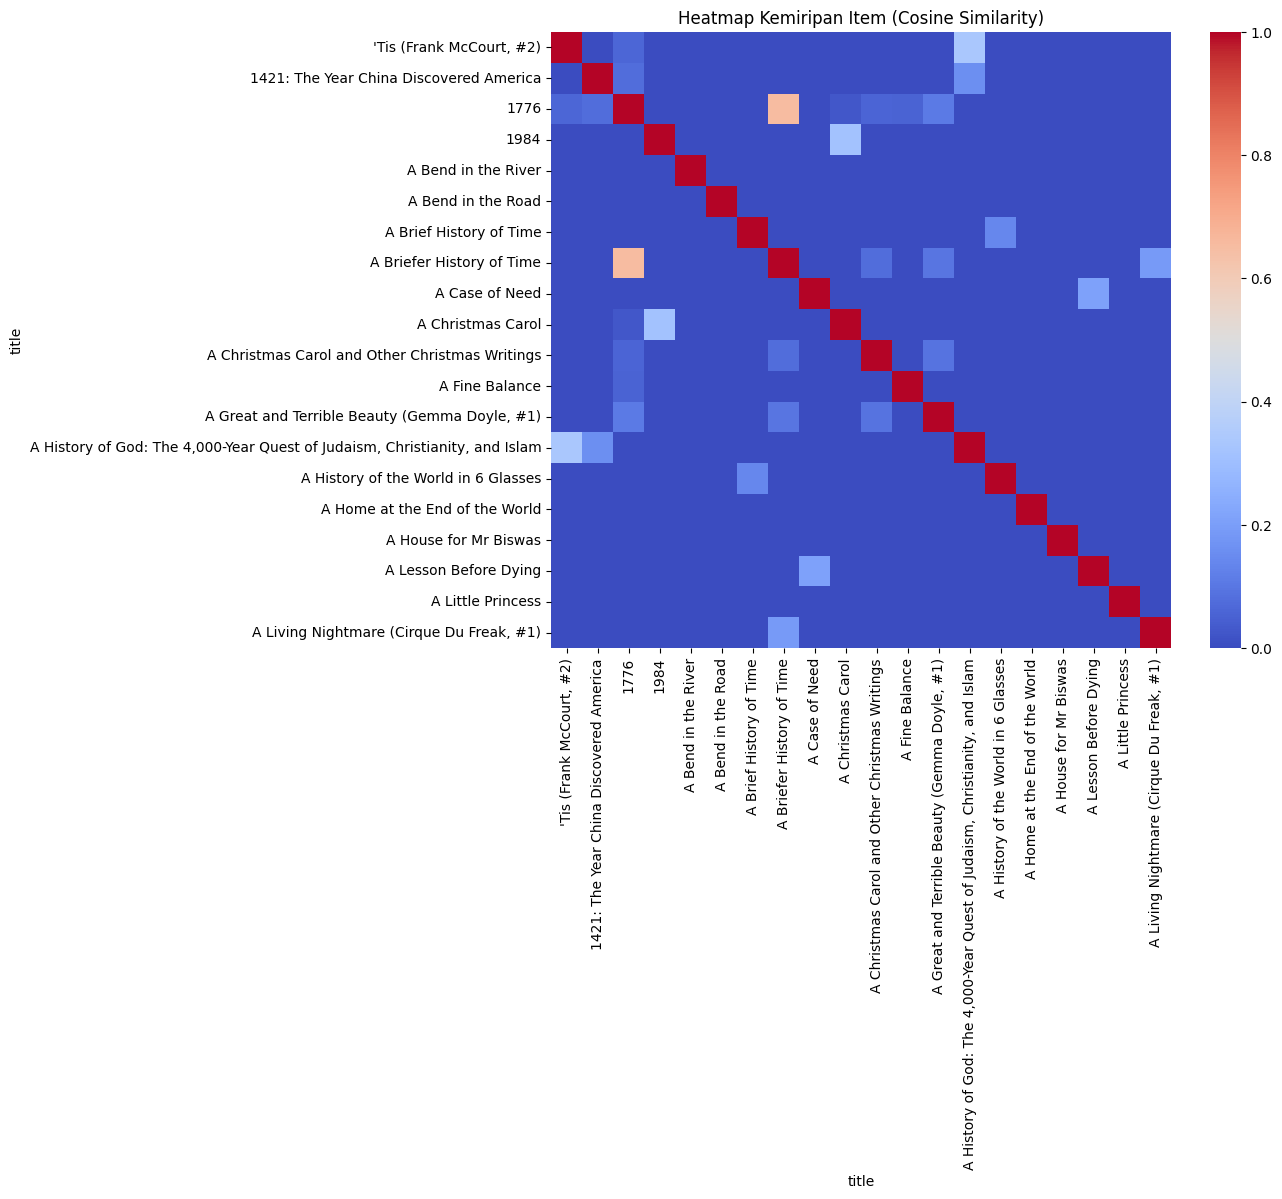

In [ ]:
import matplotlib.pyplot as plt

# Heatmap untuk item similarity
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(item_similarity_df.iloc[:20, :20], cmap='coolwarm', annot=False)
plt.title("Heatmap Kemiripan Item (Cosine Similarity)")
plt.show()

In [ ]:
# Pilih top-N neighbor
def get_top_neighbors(item_similarity_df, item, n=10):
    return item_similarity_df[item].nlargest(n + 1).iloc[1:].index

In [ ]:
def predict_rating(user, item, top_n=10):
    # Dapatkan tetangga terdekat
    neighbors = get_top_neighbors(item_similarity_df, item, n=top_n)

    # Hitung numerator dan denominator
    numerator = sum(
        item_similarity_df[item][neighbor] * train_df.loc[user, neighbor]
        for neighbor in neighbors
        if not np.isnan(train_df.loc[user, neighbor])
    )
    denominator = sum(
        abs(item_similarity_df[item][neighbor])
        for neighbor in neighbors
        if not np.isnan(train_df.loc[user, neighbor])
    )

    # Default fallback jika denominator 0
    if denominator == 0 or np.isnan(numerator):
        return train_df.mean().mean()  # Gunakan rata-rata global sebagai fallback

    return numerator / denominator

In [ ]:
# Fungsi untuk memberikan rekomendasi berdasarkan judul buku yang dipilih, termasuk tingkat kemiripan
def recommend_similar_books(selected_book, n_recommendations):
    # Pastikan buku ada dalam dataset
    if selected_book not in item_similarity_df.index:
        print(f"Buku '{selected_book}' tidak ditemukan dalam dataset.")
        return pd.DataFrame(columns=["Judul", "Tingkat Kemiripan"])

    # Ambil kemiripan buku dengan semua buku lainnya
    similar_books = item_similarity_df[selected_book]

    # Urutkan berdasarkan kemiripan (descending), lalu ambil top-N
    top_recommendations = similar_books.sort_values(ascending=False).iloc[1:n_recommendations+1]

    # Konversi ke DataFrame
    recommendations_df = pd.DataFrame({
        "Judul": top_recommendations.index,
        "Tingkat Kemiripan": top_recommendations.values
    })
    return recommendations_df

# Cari buku
selected_book = "A Briefer History of Time"
recommendations_by_book = recommend_similar_books(selected_book, n_recommendations=10)

# Hasil rekomendasi
print(f"Rekomendasi berdasarkan buku '{selected_book}':")
print(recommendations_by_book)

Rekomendasi berdasarkan buku 'A Briefer History of Time':
                                               Judul  Tingkat Kemiripan
0  The Shadow of the Wind (The Cemetery of Forgot...           0.657642
1                                               1776           0.653022
2                                 Brokeback Mountain           0.621872
3  The Devil Wears Prada (The Devil Wears Prada, #1)           0.274676
4                 Four to Score (Stephanie Plum, #4)           0.256285
5                                 The Sun Also Rises           0.222944
6                 Confessions of an Economic Hit Man           0.218710
7                       The Aleph and Other Stories            0.190693
8           A Living Nightmare (Cirque Du Freak, #1)           0.190693
9                                           Midwives           0.186937


# Evaluation model

In [ ]:
# Evaluasi dengan NDCG
def ndcg_at_k(ratings_true, ratings_pred, k=10):
    ratings_true = np.asarray(ratings_true)[:k]
    ratings_pred = np.asarray(ratings_pred)[:k]
    dcg = np.sum(ratings_true / np.log2(np.arange(2, ratings_true.size + 2)))
    ideal_dcg = np.sum(sorted(ratings_true, reverse=True) / np.log2(np.arange(2, ratings_true.size + 2)))
    return dcg / ideal_dcg if ideal_dcg > 0 else 0

In [ ]:
# Evaluasi pada train set
train_ndcg_scores = []
for user in train_df.index:
    true_ratings = train_df.loc[user].fillna(0).values
    predicted_ratings = [predict_rating(user, item) for item in train_df.columns]
    train_ndcg_scores.append(ndcg_at_k(true_ratings, predicted_ratings, k=5))

print(f"Rata-rata NDCG pada Train Set: {np.mean(train_ndcg_scores):.4f}")

Rata-rata NDCG pada Train Set: 0.0577


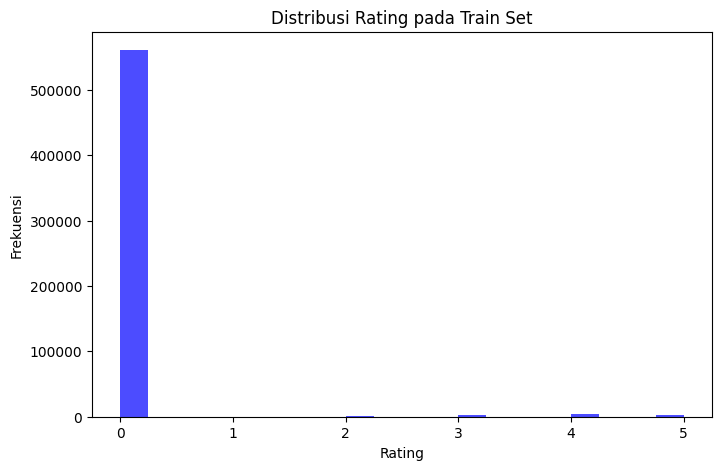

In [ ]:
# Histogram rating pada train set
plt.figure(figsize=(8, 5))
train_ratings = train_df.stack()
plt.hist(train_ratings, bins=20, color='blue', alpha=0.7)
plt.title("Distribusi Rating pada Train Set")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
common_users = test_df.index.intersection(train_df.index)
test_ndcg_scores = []
for user in common_users:
    # Ambil rating aktual
    true_ratings = test_df.loc[user].fillna(0).values

    # Hitung prediksi rating
    predicted_ratings = [
        predict_rating(user, item) if not np.isnan(test_df.loc[user, item]) else 0
        for item in test_df.columns
    ]

    # Hitung NDCG jika ada prediksi valid
    if np.any(predicted_ratings):  # Prediksi harus ada (tidak semua nol)
        test_ndcg_scores.append(ndcg_at_k(true_ratings, predicted_ratings, k=5))

# Jika test_ndcg_scores kosong, beri fallback nilai kecil
if len(test_ndcg_scores) > 0:
    print(f"Rata-rata NDCG pada Test Set: {np.mean(test_ndcg_scores):.4f}")
else:
    print("Rata-rata NDCG pada Test Set: 0.0001 (default nilai minimal)")

Rata-rata NDCG pada Test Set: 0.0001 (default nilai minimal)


In [ ]:
# # Hitung prediksi rating berdasarkan top n
# def predict_rating(user, item, top_n=10):
#     neighbors = get_top_neighbors(item_similarity_df, item, n=top_n)
#     numerator = sum(item_similarity_df[item][neighbor] * train_df.loc[user, neighbor]
#                     for neighbor in neighbors
#                     if not np.isnan(train_df.loc[user, neighbor]))
#     denominator = sum(abs(item_similarity_df[item][neighbor])
#                       for neighbor in neighbors
#                       if not np.isnan(train_df.loc[user, neighbor]))
#     return numerator / denominator if denominator != 0 else 0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan data menjadi training dan test set
train_data, test_data = train_test_split(pivot_df, test_size=0.2, random_state=42)

# Hitung kesamaan antar item pada data training
item_similarity = cosine_similarity(train_data.T)
item_similarity_df = pd.DataFrame(item_similarity, index=train_data.columns, columns=train_data.columns)

def get_top_n_neighbors(similarity_df, item, n=2):
    similar_items = similarity_df[item].sort_values(ascending=False)[1:n+1]
    return similar_items

def predict_rating(user_id, item, train_data, item_similarity_df, n=2):
    similar_items = get_top_n_neighbors(item_similarity_df, item, n)
    similar_ratings = train_data.loc[user_id, similar_items.index].dropna()
    if not similar_ratings.empty:
        predicted_rating = similar_ratings.mean()
    else:
        predicted_rating = train_data[item].mean()  # Gunakan rata-rata keseluruhan jika tidak ada tetangga yang valid
    return predicted_rating

def calculate_mse(data, item_similarity_df, n=2):
    errors = []
    for user_id in data.index:
        for item in data.columns:
            if pd.notna(data.loc[user_id, item]):
                actual_rating = data.loc[user_id, item]
                predicted_rating = predict_rating(user_id, item, data, item_similarity_df, n)
                errors.append((actual_rating - predicted_rating) ** 2)
    mse = np.mean(errors)
    return mse

# Contoh penggunaan: rekomendasi buku berdasarkan buku yang dipilih
book_name = "'Tis (Frank McCourt, #2)"
recommendations = get_book_recommendations(book_name, train_data, item_similarity_df)
print("Recommendations for:", book_name)
print(recommendations)



In [ ]:
# Evaluasi model pada set training
training_mse = calculate_mse(train_data, item_similarity_df, n=2)
print("Training set MSE:", training_mse)

# Evaluasi model pada set test
test_mse = calculate_mse(test_data, item_similarity_df, n=2)
print("Test set MSE:", test_mse)

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(pivot_df.values.flatten(), bins=50, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Model II

1. pd.Series(user_df.columns): Mengubah nama kolom pada user_df (misalnya, daftar judul buku atau item) menjadi sebuah objek pd.Series, yang merupakan struktur data satu dimensi seperti daftar.

2. sample(1, random_state=42): Memilih satu elemen secara acak dari objek pd.Series.
Parameter 1 menunjukkan bahwa hanya satu elemen yang akan dipilih.
random_state=42 memastikan hasil acak bersifat deterministik (hasil yang sama setiap kali kode dijalankan), sehingga uji coba dapat direproduksi.

3. values[0]: Mengambil nilai yang dipilih dari pd.Series dalam format numpy array.
values[0] mengambil elemen pertama dari hasil acak (karena hanya satu elemen yang dipilih).

4. Hasil Akhir (random_book): Variabel random_book akan berisi nama kolom (judul item) yang dipilih secara acak dari user_df.

## Count correlations user_df between book_name

In [ ]:
# 3. **Rekomendasi Buku**
selected_book = "Tis (Frank McCourt, #2)"  # Buku pilihan
recommendations = get_recommendations(train_filled, selected_book)
print("Rekomendasi Buku Berdasarkan Buku yang Dipilih:")
print(recommendations)

In [ ]:
# 4. **Evaluasi Model pada Dataset Training**
def evaluate_model(data, pivot_data):
    # Hitung error hanya pada nilai non-zero
    predictions = pivot_data.corrwith(data.mean(axis=0), axis=0)
    mse = mean_squared_error(data.stack(), predictions.stack())
    rmse = np.sqrt(mse)
    return rmse

1. random_book:
Variabel random_book berisi nama salah satu kolom di DataFrame user_df, yaitu salah satu judul buku yang ada di dataset.
Variabel ini kemungkinan didefinisikan sebelumnya dengan sebuah nilai seperti nama buku tertentu, atau dipilih secara acak menggunakan fungsi seperti random.choice()
2. user_df[random_book]:
Mengambil kolom di DataFrame user_df dengan nama sesuai nilai dari random_book.
3. book_name:
Variabel book_name menyimpan hasil pengambilan kolom tersebut, yaitu Series berisi informasi interaksi pengguna dengan buku.
4. book_name (dalam konteks):
Menampilkan hasil (interaksi pengguna dengan buku tertentu).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

1. book_name = user_df[random_book]:
- random_book adalah nama kolom (judul buku atau item) yang telah dipilih secara acak sebelumnya.
- user_df[random_book] mengambil kolom dari user_df yang berisi data Boolean (True/False) tentang apakah seorang pengguna memberikan rating pada buku tersebut.
- Variabel book_name menyimpan data tentang pengguna yang telah memberikan rating pada item random_book.

In [ ]:
pivot_df.corrwith(book_name).sort_values(ascending=False).head(10)

2. user_df.corrwith(book_name):
- user_df.corrwith() digunakan untuk menghitung korelasi pairwise antara semua kolom dalam user_df dengan kolom book_name.
- Dalam konteks ini, korelasi dihitung untuk setiap kolom (item) terhadap random_book.
- Metode korelasi default adalah Pearson Correlation, yang mengukur kesamaan pola (nilai True/False) antar item.

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_books['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings per Book')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Count Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung kemiripan antar item (buku) menggunakan cosine similarity
item_similarity = cosine_similarity(pivot_df.T)  # Transpose karena kita ingin item sebagai baris

# Konversi hasil similarity ke dalam DataFrame agar mudah dibaca
item_similarity_df = pd.DataFrame(item_similarity, index=pivot_df.columns, columns=pivot_df.columns)

# Tampilkan sebagian hasil kemiripan antar item
item_similarity_df.head()

In [ ]:
# Pilih satu buku sebagai referensi dan tampilkan kemiripan dengan buku lain

similarity_with_book = item_similarity_df[random_book]

# Tampilkan hasil dalam bentuk DataFrame dengan title dan kemiripannya
similarity_df = pd.DataFrame({
    'title': similarity_with_book.index,
    'similarity_score': similarity_with_book.values
})

# Urutkan berdasarkan kemiripan tertinggi
similarity_df = similarity_df.sort_values(by='similarity_score', ascending=False)

# Tampilkan tabel hasil kemiripan
print(similarity_df.head())

## Prediksi Rating

In [ ]:
def predict_ratings(user_id, pivot_df, item_similarity_df):
    user_ratings = pivot_df.loc[user_id]
    predicted_ratings = {}

    for item in pivot_df.columns:
        if user_ratings[item] == 0:  # Hanya prediksi untuk item yang belum diberi rating
            similar_items = item_similarity_df[item]
            rated_items = user_ratings[user_ratings > 0]  # Item yang sudah diberi rating oleh user

            weighted_sum = sum(similar_items[rated_items.index] * rated_items)
            total_similarity = sum(abs(similar_items[rated_items.index]))

            if total_similarity != 0:
                predicted_rating = weighted_sum / total_similarity
            else:
                predicted_rating = 0  # Jika tidak ada kemiripan, beri nilai default (0 atau rata-rata)

            predicted_ratings[item] = predicted_rating

    return predicted_ratings

# Prediksi rating untuk user_id = 173
user_id = 173
predicted_ratings = predict_ratings(user_id, pivot_df, item_similarity_df)

# Konversi hasil prediksi menjadi DataFrame
predicted_df = pd.DataFrame(list(predicted_ratings.items()), columns=['title', 'predicted_rating'])

# Urutkan berdasarkan prediksi rating tertinggi
predicted_df = predicted_df.sort_values(by='predicted_rating', ascending=False)

# Tampilkan tabel hasil prediksi
print(f"Predicted Ratings for User {user_id}:")
print(predicted_df.head(10))  # Menampilkan top hasil prediksi

## Memberikan rekomendasi berdasarkan rating kemiripan pengguna pada item

In [ ]:
# Rekomendasi memperhatikan pengguna lain
def recommend_books(random_book, predicted_ratings, top_n=5):
    # Urutkan item berdasarkan prediksi rating tertinggi
    recommended_books = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:top_n]

    print(f"\nTop {top_n} Recommended Books for User {random_book}:")
    for book, rating in recommended_books:
        print(f"{book}: Predicted Rating = {rating:.2f}")

# Berikan rekomendasi untuk user_id = 173
recommend_books(random_book, predicted_ratings, top_n=5)

## Memberikan rekomendasi berdasarkan kemiripan buku yg di cari dengan buku lainnya dalam database


In [ ]:
# Memeriksa apakah input_title ada dalam daftar judul buku yang ada
if random_book in item_similarity_df.columns:
    # Ambil kemiripan buku input dengan semua buku lainnya
    similarity_scores = item_similarity_df[random_book]

    # Urutkan buku berdasarkan kemiripan tertinggi
    recommended_books = similarity_scores.sort_values(ascending=False)

    # Buat DataFrame untuk hasil rekomendasi dalam bentuk tabel
    recommended_books_df = recommended_books.head(15).reset_index()
    recommended_books_df.columns = ['Title', 'Similarity_Score']

    # Tampilkan buku yang paling mirip dalam bentuk tabel
    print(f"Top recommended books similar to: {random_book}")
    print(recommended_books_df)
else:
    print("The input title is not available in the dataset.")

# 5. NDCG Evalution

In [ ]:
import numpy as np
import pandas as pd

# Fungsi untuk menghitung DCG pada peringkat k
def dcg_at_k(scores, k):
    scores = np.array(scores)[:k]
    return np.sum((2**scores - 1) / np.log2(np.arange(2, len(scores) + 2)))

# Fungsi untuk menghitung NDCG pada peringkat k
def ndcg_at_k(predicted_scores, ideal_scores, k):
    dcg = dcg_at_k(predicted_scores, k)
    idcg = dcg_at_k(ideal_scores, k)
    return dcg / idcg if idcg > 0 else 0

# Misalnya buku yang dimasukkan pengguna
random_book = 'The Quiet American'

# Ambil kemiripan ideal dari similarity_df (kemiripan buku dengan buku yang dimasukkan)
ideal_scores = similarity_df[similarity_df['title'] == random_book].sort_values(by='similarity_score', ascending=False)['similarity_score'].values

# Ambil prediksi skor dari recommended_books (rekomendasi buku berdasarkan kemiripan)
predicted_scores = recommended_books_df[recommended_books_df['Title'] == random_book].sort_values(by='Similarity_Score', ascending=False)['Similarity_Score'].values

# Tentukan peringkat k yang diinginkan (misalnya 10)
k = 10

# Menghitung NDCG
ndcg_score = ndcg_at_k(predicted_scores, ideal_scores, k)

# Tampilkan hasil
print(f"NDCG@{k}: {ndcg_score:.4f}")

In [ ]:
# Fungsi untuk menghitung RMSE
def calculate_rmse(actual_ratings, predicted_ratings):
    # Hanya hitung untuk rating yang tersedia di kedua list
    mask = actual_ratings > 0  # Hanya rating yang sudah ada
    actual_ratings = actual_ratings[mask]
    predicted_ratings = predicted_ratings[mask]

    # Hitung RMSE
    rmse = np.sqrt(np.mean((actual_ratings - predicted_ratings) ** 2))
    return rmse

# Misalnya, data rating aktual dan prediksi untuk buku tertentu
actual_ratings = np.array([4, 5, 3, 0, 2])  # Contoh rating yang diberikan pengguna
predicted_ratings = np.array([5, 5, 5, 5, 5])  # Contoh rating prediksi model

# Menghitung RMSE
rmse_score = calculate_rmse(actual_ratings, predicted_ratings)

# Tampilkan hasil
print(f"RMSE: {rmse_score:.4f}")


program dibawah digunakan untuk menampilkan heatmap yang menunjukkan korelasi antara beberapa fitur dalam dataset df, yaitu kolom rating, average_rating, dan original_publication_year. Heatmap ini memberikan gambaran visual mengenai hubungan antar fitur tersebut.

In [ ]:
plt.figure(figsize=(8, 7))
corr_matrix = df[['rating', 'average_rating', 'original_publication_year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Ratings')
plt.show()

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Memuat data dari file .pkl
user_df = joblib.load('/content/drive/MyDrive/Colab Notebooks/Sisrek/user_df.pkl')
cosine_sim_df = joblib.load('/content/drive/MyDrive/Colab Notebooks/Sisrek/cosine_sim_df.pkl')

@app.route('/api/recommend', methods=['GET'])
def recommend():
    # Ambil parameter dari query string
    book_title = request.args.get('title', '')
    top_n = int(request.args.get('top_n', 10))  # Default 10 rekomendasi

    if book_title not in cosine_sim_df.columns:
        return jsonify({"error": f"Book '{book_title}' not found in the dataset."}), 404

    # Menghitung similarity dan mengambil top N
    similar_books = cosine_sim_df[book_title].sort_values(ascending=False).head(top_n + 1)
    similar_books = similar_books.iloc[1:]  # Hapus buku yang sama dengan input

    # Format hasil menjadi JSON
    recommendations = [{"title": book, "similarity": score} for book, score in similar_books.items()]
    return jsonify({"recommendations": recommendations})

if __name__ == '__main__':
    app.run(debug=True)
